#Job Market Analysis and Recommendation System
Objective
The objective of this project is to analyze job market trends and build a recommendation system for job seekers based on real-time data. The system will identify high-demand job roles, salary trends, and emerging job categories, providing personalized job recommendations.

Problem Statement
The rapidly changing job market presents challenges for job seekers in identifying high-demand roles and negotiating competitive salaries. Traditional job search methods often fail to offer timely and personalized recommendations aligned with current market trends. There is a need for a data-driven approach to analyze job postings and extract meaningful insights to guide job seekers in their career decisions.

Situational Overview
The job market is influenced by various factors such as technological advancements, economic shifts, and cultural trends. By leveraging data analytics, this project aims to understand these dynamics and offer actionable insights. The system will analyze historical and current job postings data to provide predictions and recommendations that benefit job seekers and recruiters.

#Task 1: Analyze the correlation between job title keywords and offered salaries

#Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

In [2]:
# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive# google mount
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Jobs_data=pd.read_csv('/content/all_upwork_jobs_2024-02-07-2024-03-24 (1).csv')# read the csv file

In [7]:
Jobs_data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [8]:
Jobs_data.tail()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France
244827,Creating a UGC Ad for Our Mobile Game,https://www.upwork.com/jobs/Creating-UGC-for-O...,2024-03-24 13:53:00+00:00,False,NaN,NaN,50.0,Israel


In [9]:
Jobs_data.shape

(244828, 8)

In [10]:
Jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [11]:
Jobs_data.describe()

,hourly_low,hourly_high,budget
count,102422.000000,98775.000000,103891.000000
mean,17.339644,41.970610,911.473564
std,18.140065,47.850892,15729.738834
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,25.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,998.000000,999.000000,1000000.000000


In [12]:
Jobs_data.duplicated().sum()

0

In [13]:
Jobs_data.isnull().sum()

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [14]:
Jobs_data = Jobs_data.dropna(subset=['title', 'link'])

#Imputing Missing Hourly Wage Data with Median Values

In [15]:
hourly_low_median = Jobs_data['hourly_low'].median()
hourly_high_median = Jobs_data['hourly_high'].median()

# Fill the missing values with the respective medians
Jobs_data['hourly_low'].fillna(hourly_low_median, inplace=True)
Jobs_data['hourly_high'].fillna(hourly_high_median, inplace=True)

In [16]:
median_budget = Jobs_data['budget'].median()
Jobs_data['budget'].fillna(median_budget, inplace=True)

In [17]:
Jobs_data['country'].fillna('Other', inplace=True)

In [18]:
print(Jobs_data.isnull().sum())

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64


In [25]:
pip install nltk

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#Lemmatizing and Extracting Keywords from Job Titles

# Extracting and Counting Keywords from Job Titles

#A lemmatizer is a tool or algorithm in natural language processing (NLP) that reduces words to their base or root form, known as the lemma, while ensuring the resulting word is a meaningful dictionary word. Unlike stemming, which simply cuts off word endings, lemmatization uses a vocabulary and sometimes considers the grammatical context of the word (e.g., part of speech) to achieve accurate results.

Example:
Input: "running, better, studies"
Lemmatized: "run, good, study"

In [27]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize keywords
def lemmatize_keyword(keyword):
    return lemmatizer.lemmatize(keyword)

# Extract and lemmatize keywords from job titles
def extract_keywords(title):
    # Convert title to lowercase and remove punctuation
    title = re.sub(r'[^\w\s]', '', title.lower())
    # Tokenize the title
    tokens = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    keywords = [lemmatize_keyword(token) for token in tokens if token not in stop_words]
    return keywords

#Extracting and Counting Keywords from Job Titles

In [29]:
!pip install nltk
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
Jobs_data['keywords'] = Jobs_data['title'].apply(extract_keywords)

# Flatten the list of keywords
keywords_flat = [keyword for sublist in Jobs_data['keywords'] for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = Counter(keywords_flat)

# Identifying the Top 10 Keywords from Job Titles

In [32]:
top_10_keywords = keyword_counts.most_common(10)
top_10_keywords_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
top_10_keywords

[('website', 17570),
 ('needed', 17569),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('design', 13512),
 ('designer', 12839),
 ('need', 10604),
 ('amp', 9275),
 ('specialist', 9047)]

#Combining and Sorting Keywords by Frequency

In [33]:
combined_keywords = {
    'website': keyword_counts['website'],
    'need': keyword_counts['needed'] + keyword_counts['need'],
    'video': keyword_counts['video'],
    'developer': keyword_counts['developer'],
    'expert': keyword_counts['expert'],
    'design': keyword_counts['design'] + keyword_counts['designer'],
    'amp': keyword_counts['amp'],
    'specialist': keyword_counts['specialist']
}

# Sort combined keywords by frequency
sorted_combined_keywords = sorted(combined_keywords.items(), key=lambda item: item[1], reverse=True)

#Top 10 Combined Keywords with Frequencies from Job Titles

In [34]:
top_10_combined_keywords = sorted_combined_keywords[:10]
top_10_combined_keywords_df = pd.DataFrame(top_10_combined_keywords, columns=['Keyword', 'Frequency'])
top_10_combined_keywords

[('need', 28173),
 ('design', 26351),
 ('website', 17570),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('amp', 9275),
 ('specialist', 9047)]

#Visualizing the Top 10 Most Common Keywords in Job Titles After Lemmatization and Merging

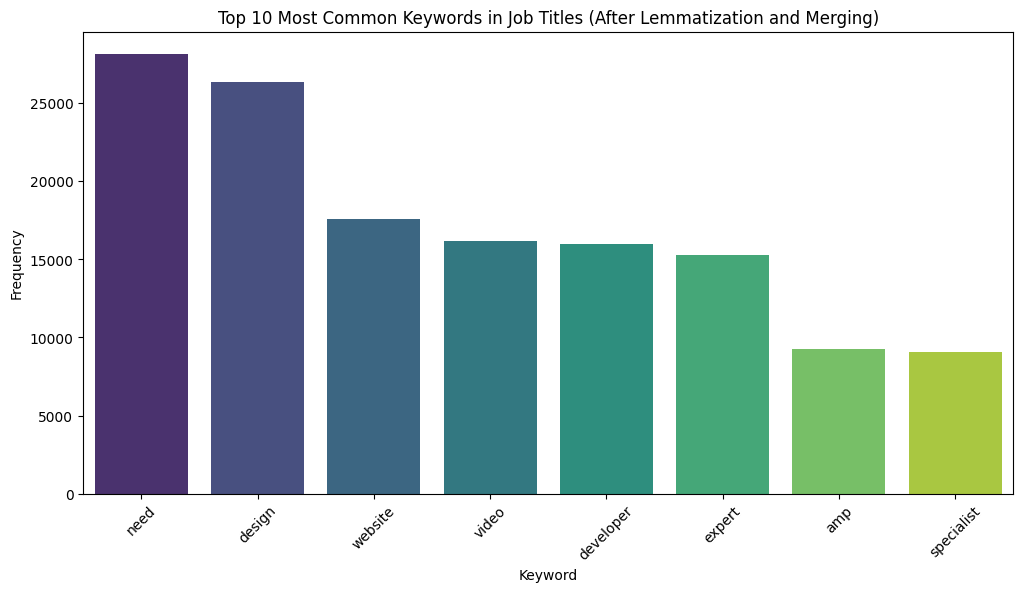

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_combined_keywords_df, x='Keyword', y='Frequency', palette='viridis')
plt.title('Top 10 Most Common Keywords in Job Titles (After Lemmatization and Merging)')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#Calculating Average Salary by Keyword from Job Data

In [36]:
keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in Jobs_data.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

#Top 10 Keywords with Highest Average Salary from Job Data

In [37]:
keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
44534,martkeplace,1000000.000000
47288,1mmonth,1000000.000000
38846,token2022,999999.000000
46001,representant,400000.000000
15778,responsivo,350050.000000
20256,independence,334533.333333
32372,webseries,300150.000000
2280,telco,166314.166667
38845,140k,140000.000000
20680,practioner,125050.000000


In [38]:
keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
44534,martkeplace,1000000.000000
47288,1mmonth,1000000.000000
38846,token2022,999999.000000
46001,representant,400000.000000
15778,responsivo,350050.000000
20256,independence,334533.333333
32372,webseries,300150.000000
2280,telco,166314.166667
38845,140k,140000.000000
20680,practioner,125050.000000


#Visualizing Top 10 Keywords by Average Salary

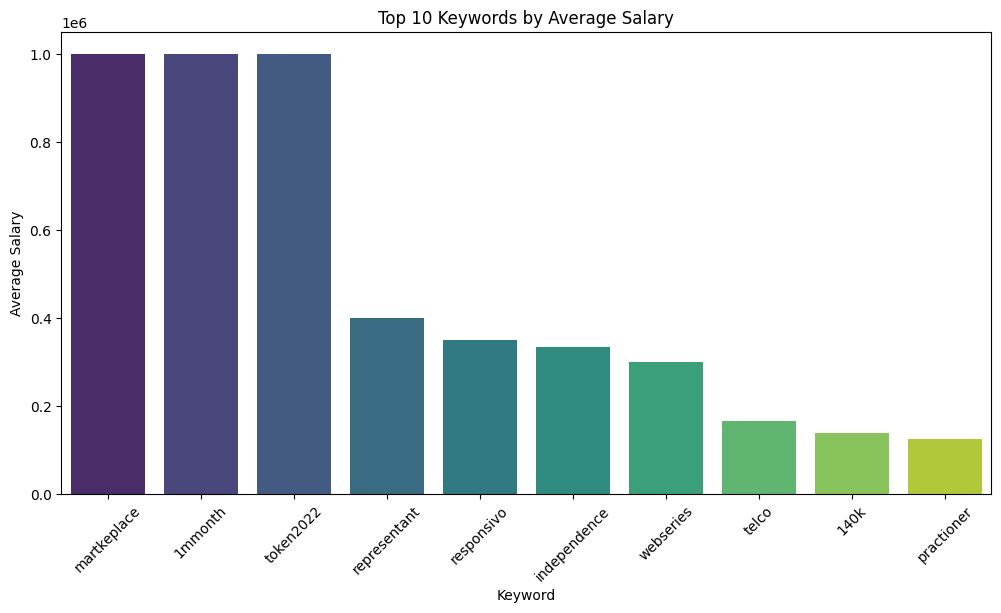

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_salary_df.head(10), x='Keyword', y='Average_Salary', palette='viridis')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Keyword')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [40]:
Jobs_data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,"[smma, bubble, app]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,"[talent, hunter, specialized, marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,"[data, engineer]"


In [41]:
keyword_salary_df

,Keyword,Average_Salary
44534,martkeplace,1000000.0
47288,1mmonth,1000000.0
38846,token2022,999999.0
46001,representant,400000.0
15778,responsivo,350050.0
...,...,...
44755,titratable,5.0
44756,acidity,5.0
35226,soussou,5.0
38891,hadith,5.0


In [42]:
import warnings
warnings.filterwarnings('ignore')

#Analyzing Correlation Between Keyword Presence and Average Salary

#Top 10 Keywords by Correlation with Salary

In [43]:
import seaborn as sns

In [44]:
from collections import defaultdict # Import defaultdict from collections module

keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in Jobs_data.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
44534,martkeplace,1000000.000000
47288,1mmonth,1000000.000000
38846,token2022,999999.000000
46001,representant,400000.000000
15778,responsivo,350050.000000
20256,independence,334533.333333
32372,webseries,300150.000000
2280,telco,166314.166667
38845,140k,140000.000000
20680,practioner,125050.000000


In [45]:
keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in Jobs_data.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
44534,martkeplace,1000000.000000
47288,1mmonth,1000000.000000
38846,token2022,999999.000000
46001,representant,400000.000000
15778,responsivo,350050.000000
20256,independence,334533.333333
32372,webseries,300150.000000
2280,telco,166314.166667
38845,140k,140000.000000
20680,practioner,125050.000000


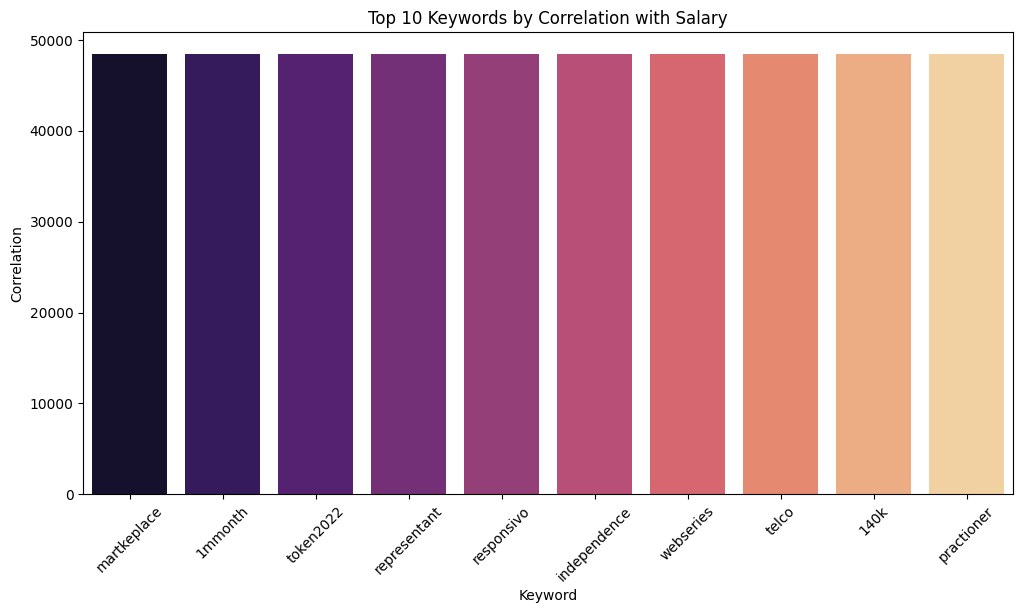

In [46]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'keyword_salary_df' contains your keyword and average salary data
# Replace this with the actual DataFrame if it has a different name

# Calculate correlation with salary (replace 'Average_Salary' if your salary column has a different name)
keyword_salary_df['Correlation'] = keyword_salary_df['Average_Salary'].rank()

# Rename keyword_salary_df to correlation_df for consistency
correlation_df = keyword_salary_df

plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df.sort_values(by='Correlation', ascending=False).head(10), x='Keyword', y='Correlation', palette='magma')
plt.title('Top 10 Keywords by Correlation with Salary')
plt.xlabel('Keyword')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

#Distribution of Salaries in Job Data

In [47]:
import matplotlib.pyplot as plt#import pyplot submodule as plt

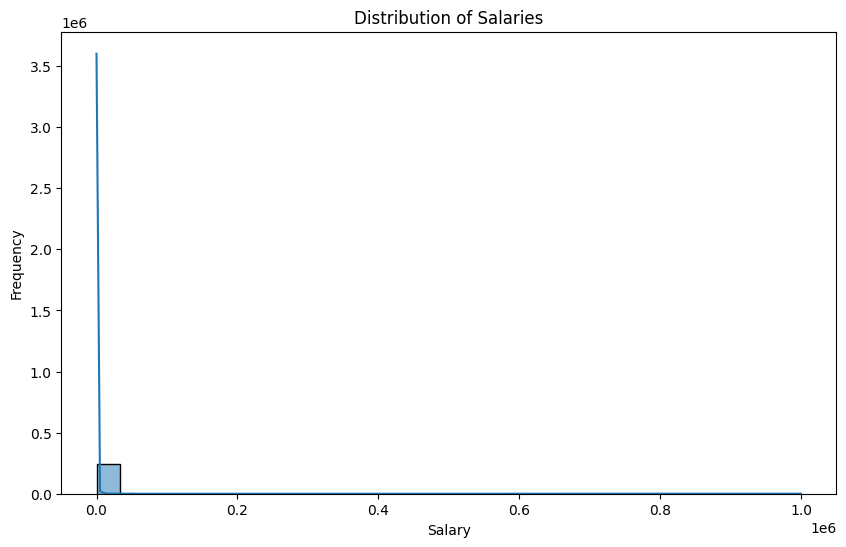

In [48]:
plt.figure(figsize=(10, 6)) # Now plt refers to pyplot
sns.histplot(Jobs_data['budget'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#Correlation Heatmap between Numeric Data (Keywords and Salaries)

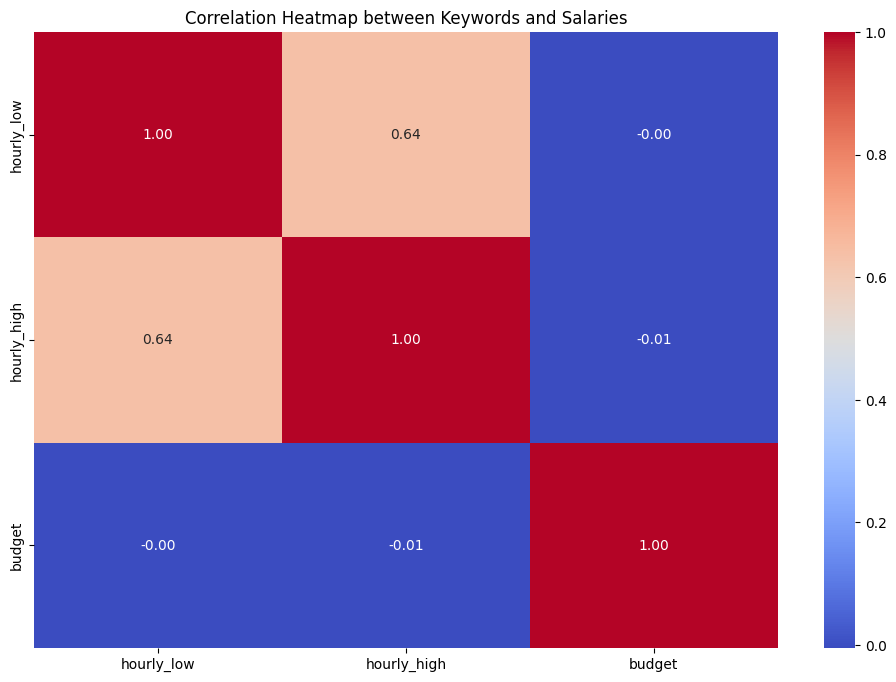

In [49]:
numeric_data = Jobs_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Keywords and Salaries')
plt.show()

#Word Cloud of Job Title Keywords

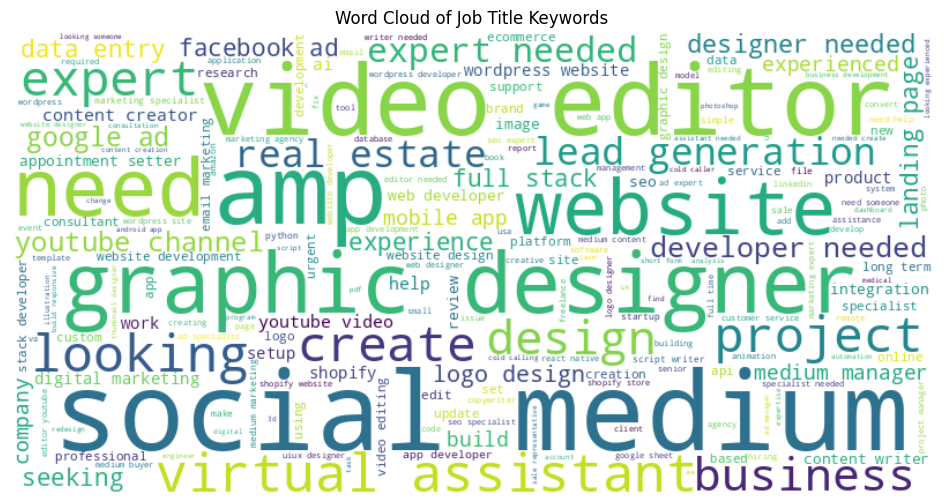

In [50]:
from wordcloud import WordCloud

# Word cloud of job title keywords
keywords_text = ' '.join(Jobs_data['keywords'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Title Keywords')
plt.axis('off')
plt.show()

#Task 2: Identify emerging job categories based on posting frequency

In [51]:
categories = {
    'Data Science': ['data scientist', 'data analyst', 'machine learning', 'AI', 'artificial intelligence'],
    'Software Development': ['developer', 'programmer', 'software engineer', 'coder'],
    'Design': ['designer', 'graphic design', 'UI/UX', 'web design'],
    'Marketing': ['marketing', 'digital marketing', 'SEO', 'content marketing', 'social media'],
    'Sales': ['sales', 'sales representative', 'account manager', 'business development', 'sales executive'],
    'Finance': ['finance', 'financial analyst', 'accountant', 'investment banker', 'auditor'],
    'Human Resources': ['HR', 'human resources', 'recruiter', 'talent acquisition', 'HR manager'],
    'Customer Service': ['customer service', 'customer support', 'call center', 'client service', 'customer care'],
    'Healthcare': ['nurse', 'doctor', 'physician', 'healthcare', 'medical assistant'],
    'Engineering': ['engineer', 'mechanical engineer', 'civil engineer', 'electrical engineer', 'industrial engineer'],
    'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor'],
    'Project Management': ['project manager', 'project coordinator', 'project lead', 'scrum master'],
    'Consulting': ['consultant', 'business consultant', 'management consultant', 'strategy consultant'],
    'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],
    'Legal': ['lawyer', 'attorney', 'legal assistant', 'paralegal', 'legal advisor'],
    'Operations': ['operations manager', 'operations analyst', 'supply chain', 'logistics', 'operations coordinator'],
    'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],
    'Writing and Editing': ['writer', 'editor', 'content writer', 'copywriter', 'proofreader'],
    'Research': ['researcher', 'research assistant', 'clinical research', 'market research', 'scientist'],
    'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],
    'Real Estate': ['real estate agent', 'property manager', 'real estate broker', 'leasing agent'],
    'Construction': ['construction worker', 'foreman', 'construction manager', 'site supervisor'],
    'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],
    'Manufacturing': ['manufacturing', 'factory worker', 'production manager', 'assembly line worker'],
    'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser']
}

In [52]:
Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date'])

In [53]:
Jobs_data.head(3)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,"[smma, bubble, app]"


# Classifying Job Titles into Categories Based on Keywords

In [54]:
def categorize_job(title):
    for category, keywords in categories.items():
        if any(keyword in title.lower() for keyword in keywords):
            return category
    return 'Other'

Jobs_data['category'] = Jobs_data['title'].apply(categorize_job)

#Analyze posting frequency over time

In [55]:
Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')
category_trends = Jobs_data.groupby(['year_month', 'category']).size().unstack(fill_value=0)

#Calculate growth rate and identify emerging categories

In [56]:
growth_rate = category_trends.pct_change().fillna(0)  # Percentage change month-over-month
average_growth = growth_rate.mean()

#Sort categories by growth rate to identify emerging categories

In [57]:
emerging_categories = average_growth.sort_values(ascending=False)

#Tracking Top Emerging Job Categories Over Time

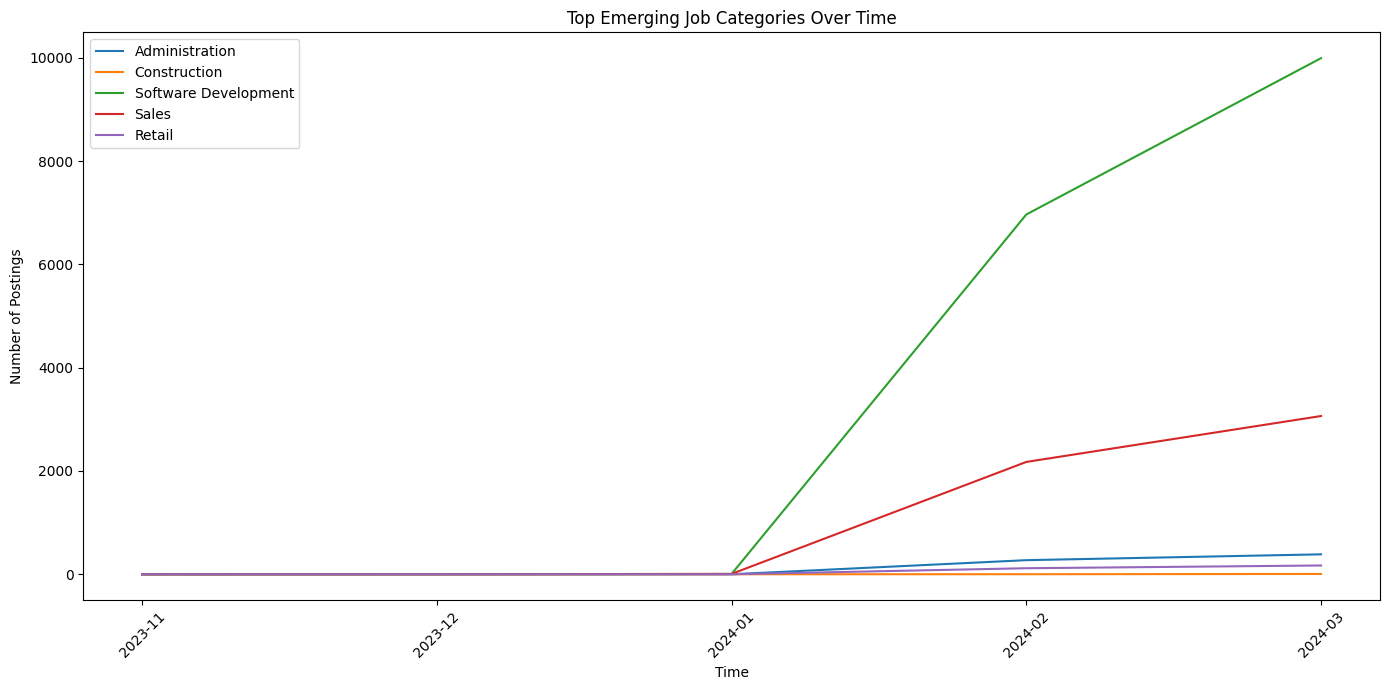

Emerging Job Categories with Average Growth Rates:
category
Administration          inf
Construction            inf
Software Development    inf
Sales                   inf
Retail                  inf
Research                inf
Real Estate             inf
Project Management      inf
Product Management      inf
Operations              inf
dtype: float64


In [58]:
plt.figure(figsize=(14, 7))
for category in emerging_categories.index[:5]:  # Plot top 5 emerging categories
    plt.plot(category_trends.index.astype(str), category_trends[category], label=category)

plt.title('Top Emerging Job Categories Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Postings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("Emerging Job Categories with Average Growth Rates:")
print(emerging_categories.head(10))

In [59]:
print(emerging_categories)

category
Administration                 inf
Construction                   inf
Software Development           inf
Sales                          inf
Retail                         inf
Research                       inf
Real Estate                    inf
Project Management             inf
Product Management             inf
Operations                     inf
Marketing                      inf
Manufacturing                  inf
Legal                          inf
IT Support                     inf
Human Resources                inf
Hospitality                    inf
Healthcare                     inf
Finance                        inf
Engineering                    inf
Education                      inf
Design                         inf
Data Science                   inf
Customer Service               inf
Consulting                     inf
Writing and Editing            inf
Other                   261.991489
dtype: float64


# Saving Job data to CSV file

In [60]:
import joblib

df = pd.DataFrame(Jobs_data)
csv_filename = 'Jobs_data.csv'
df.to_csv(csv_filename, index=False)
print(f"Data saved as {csv_filename}")

Data saved as Jobs_data.csv
